### 딥 러닝을 이용한 자연어 처리 입문 : 06-04 자동 미분과 선형 회귀 실습


1. 텐서플로우로 선형회귀 구현

In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf

In [5]:
w = tf.Variable(2.)

In [6]:
# 2w^2 + 5 에 대한 식을 세우고, w에 대해 미분
# tape_gradient() 자동 미분 기능을 수행
def f(w) :
    y = w ** 2
    z = 2 * y + 5

    return z 

with tf.GradientTape() as tape : 
    z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)


[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [7]:
# 자동 미분을 이용한 선형 회귀 구현
# 가중치 변수 w와 b를 선언. 임의의 값인 4와 1로 초기화
w = tf.Variable(4.0)
b = tf.Variable(1.0)

@tf.function
def hypothesis(x):
    return w*x+b

x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [8]:
@tf.function
def mse_loss(y_pred, y):
    # 두 개의 차이값을 제곱을 해서 평균을 취함
    return tf.reduce_mean(tf.square(y_pred - y))

In [9]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

optimizer = tf.optimizers.SGD(0.01)  # 경사하강법 사용하며 학습률 0.01사용 

In [10]:
for i in range(301):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 x 에 대한 예측값을 y_pred
        y_pred =hypothesis(x)

        # 평균 제곱 오차를 계산
        cost = mse_loss(y_pred, y)

    # 손실함수에 대한 파라미터의 미분값 계산
    gradients = tape.gradient(cost, [w,b])

    # 파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [w,b]))

    if i%10 == 0:
        print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [11]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())


[38.35479  54.295143 59.608593 64.92204 ]


2. 케라스로 선형 회귀 구현

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# keras는 numpy 배열이나 tensorflow를 학습데이터로 사용해야 함. 그냥 list 안됨.


x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]) # 공부하는 시간
y = np.array([11, 22, 33, 44, 53, 66, 77, 87, 95]) # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(learning_rate=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 4397.2324 - mse: 4397.2324

c:\Users\User\anaconda3\envs\jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 4397.2324 - mse: 4397.2324
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 542.1666 - mse: 542.1666
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 67.8281 - mse: 67.8281
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.4628 - mse: 9.4628
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.2798 - mse: 2.2798
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.3945 - mse: 1.3945
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2840 - mse: 1.2840
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.2689 - mse: 1.2689
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2656 - mse: 1.2656
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2637 - mse: 1.2637
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2620 - mse: 1.2620
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2603 - mse: 1.2603
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


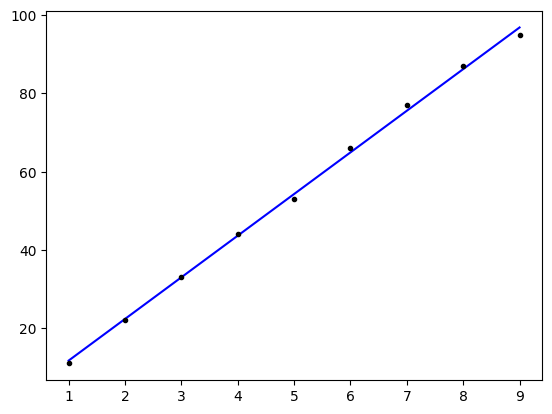

In [16]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [20]:
x_input = np.array([[9.5]])
print(model.predict(x_input))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[102.14581]]
